In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SpectralSynthesis as ss
import pickle
from tqdm import tqdm

In [2]:
N_X = 22000
H_RANGE = [0,1]
S_RANGE = [0,3]
N_PIX = 128
E_DIMENSIONS = 2

PERIODIC = False
NOISE = True
EXP = True

In [3]:
H_list = np.random.uniform(H_RANGE[0], H_RANGE[1], N_X)
S_list = np.random.uniform(S_RANGE[0], S_RANGE[1], N_X)
noise_pct_list = np.random.random(N_X)*0.01

In [4]:
parameters = np.array([H_list, S_list, noise_pct_list]).T
parameters[0]

array([2.13525631e-01, 1.82525636e+00, 5.74797617e-04])

In [5]:
def generate_data(parameter, N_PIX, PERIODIC, EXP):
    H,S,NOISE_FRACTION=parameter
    if PERIODIC:
        field = ss.fBm(E=E_DIMENSIONS,exp=EXP,H=H,sigma=S,N=N_PIX, centred = False)
    else:
        field = ss.fBm(E=E_DIMENSIONS,exp=EXP,H=H,sigma = S, N=N_PIX*4, centred=False)
        field = field[int((N_PIX*4-N_PIX)/2):int((N_PIX*4+N_PIX)/2),int((N_PIX*4-N_PIX)/2):int((N_PIX*4+N_PIX)/2)]

    m_1_field = np.mean(field)
    s_1_field = np.std(field)
    m_2_field = 0
    s_2_field = 1/4

    field *= s_2_field/s_1_field
    field += (m_2_field-m_1_field*s_2_field/s_1_field)

    if NOISE:
        noise = ss.fBm(E=E_DIMENSIONS,exp=False,H=-1,N=N_PIX)

        m_1_noise = np.mean(noise)
        s_1_noise = np.std(noise)
        m_2_noise = 0
        s_2_noise = s_2_field*NOISE_FRACTION

        noise *= s_2_noise/s_1_noise
        noise += (m_2_noise-m_1_noise*s_2_noise/s_1_noise)

        field += noise

    m_1_field = np.mean(field)
    s_1_field = np.std(field)
    m_2_field = 0
    s_2_field = 1/4

    field *= s_2_field/s_1_field
    field += (m_2_field-m_1_field*s_2_field/s_1_field)

    field[np.where(field>1.)] = 1.
    field[np.where(field<-1.)] = -1.

    field1 = (field-np.min(field))/(np.max(field)-np.min(field))
    field2 = np.rot90(field1)
    field3 = np.rot90(field2)
    field4 = np.rot90(field3)
    
    return [(field1,parameter),(field2,parameter),(field3,parameter),(field4,parameter)]

#DATA = []
#for parameter in tqdm(parameters):
#    field_list = generate_data(parameter,N_PIX,PERIODIC,EXP)
#    for datum in field_list:
#        DATA.append(datum)

DATA = [datum for parameter in tqdm(parameters) for datum in generate_data(parameter,N_PIX,PERIODIC,EXP)]

DATA

  0%|                                                                                        | 0/22000 [00:00<?, ?it/s]D:\Workshop\PhD\Scripts\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)
D:\Workshop\PhD\Scripts\SpectralSynthesis.py:62: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phaseneg = phase[[slice(None,None,-1)]*E]
D:\Workshop\PhD\Scripts\SpectralSynthesis.py:72: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  A[i_minus] += A[i_plus]
D:\Workshop\PhD\Scripts

[(array([[0.05538693, 0.12616137, 0.16715694, ..., 0.00863267, 0.00890466,
          0.00866451],
         [0.08967799, 0.2574114 , 0.2271984 , ..., 0.00596888, 0.00600007,
          0.00447882],
         [0.03582627, 0.14755906, 0.04741579, ..., 0.00581631, 0.01582536,
          0.00696852],
         ...,
         [0.0668394 , 0.02230349, 0.0513519 , ..., 0.15342531, 0.03656022,
          0.02835078],
         [0.1392016 , 0.06673374, 0.05065869, ..., 0.18959967, 0.04233266,
          0.07353387],
         [0.0959259 , 0.09787374, 0.04528424, ..., 0.07335884, 0.07064595,
          0.05124629]]),
  array([2.13525631e-01, 1.82525636e+00, 5.74797617e-04])),
 (array([[0.00866451, 0.00447882, 0.00696852, ..., 0.02835078, 0.07353387,
          0.05124629],
         [0.00890466, 0.00600007, 0.01582536, ..., 0.03656022, 0.04233266,
          0.07064595],
         [0.00863267, 0.00596888, 0.00581631, ..., 0.15342531, 0.18959967,
          0.07335884],
         ...,
         [0.16715694, 0.2271

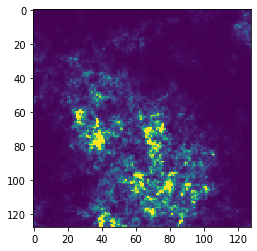

In [6]:
plt.imshow(DATA[1][0])

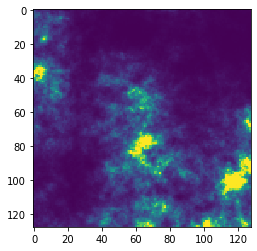

In [7]:
import random

random.shuffle(DATA)

plt.imshow(DATA[1][0])

In [8]:
X = []
H = []
S = []
noise = []
for datum in tqdm(DATA):
    X.append(datum[0])
    H.append(datum[1][0])
    S.append(datum[1][1])
    noise.append(datum[1][2])
    
y = [np.array(H),np.array(S),np.array(noise)]
    
X = np.array(X).reshape(-1, N_PIX, N_PIX, 1)
y

100%|████████████████████████████████████████████████████████████████████████| 88000/88000 [00:00<00:00, 536586.81it/s]


[array([0.19344591, 0.49591256, 0.07960529, ..., 0.80815621, 0.63678462,
        0.21354942]),
 array([2.32541738, 2.34792227, 1.04474141, ..., 2.39285147, 2.35931516,
        1.2876667 ]),
 array([0.00428924, 0.00232571, 0.00776888, ..., 0.00558961, 0.00480853,
        0.00033784])]

In [9]:
X.shape

(88000, 128, 128, 1)

In [10]:
y

[array([0.19344591, 0.49591256, 0.07960529, ..., 0.80815621, 0.63678462,
        0.21354942]),
 array([2.32541738, 2.34792227, 1.04474141, ..., 2.39285147, 2.35931516,
        1.2876667 ]),
 array([0.00428924, 0.00232571, 0.00776888, ..., 0.00558961, 0.00480853,
        0.00033784])]

In [11]:
import time
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.callbacks import TensorBoard

In [12]:
layer_size = 256
kernel_size = (3,3)
epochs = 200

NAME = "5-conv-{}-channels-5-dense-{}-epochs".format(layer_size,epochs)
print(NAME)

inp =  Input(shape = X.shape[1:])

conv1 = Conv2D(layer_size, kernel_size, activation = 'relu')(inp)
pool1 = MaxPooling2D(pool_size = (2,2))(conv1)

conv2 = Conv2D(layer_size, kernel_size, activation = 'relu')(pool1)
pool2 = MaxPooling2D(pool_size = (2,2))(conv2) 

conv3 = Conv2D(layer_size, kernel_size, activation = 'relu')(pool2)
pool3 = MaxPooling2D(pool_size = (2,2))(conv3)

conv4 = Conv2D(layer_size, kernel_size, activation = 'relu')(pool3)
pool4 = MaxPooling2D(pool_size = (2,2))(conv4)

conv5 = Conv2D(layer_size, kernel_size, activation = 'relu')(pool4)
pool5 = MaxPooling2D(pool_size = (2,2))(conv5)

flat1 = Flatten()(pool5)

dense1 = Dense(layer_size)(flat1)
dense2 = Dense(layer_size)(dense1)
dense3 = Dense(layer_size)(dense2)
dense4 = Dense(layer_size)(dense3)
dense5 = Dense(layer_size)(dense4)

out_H = Dense(1)(dense5)
out_sigma = Dense(1)(dense5)
out_noise = Dense(1)(dense5)

model = Model(inp, [out_H,out_sigma,out_noise])

#tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='mse', optimizer = 'rmsprop', metrics=['accuracy'])
model.fit(X,y, batch_size=32, epochs=epochs, validation_split = 0.3)

5-conv-256-channels-5-dense-200-epochs
Train on 61599 samples, validate on 26401 samples
Epoch 1/200
61599/61599 [==============================] - 428s 7ms/sample - loss: 13.9826 - dense_5_loss: 2.9648 - dense_6_loss: 10.8693 - dense_7_loss: 0.1482 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.1457 - val_dense_5_loss: 0.0212 - val_dense_6_loss: 0.1237 - val_dense_7_loss: 6.3363e-04 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00
Epoch 2/200
61599/61599 [==============================] - 409s 7ms/sample - loss: 0.1296 - dense_5_loss: 0.0125 - dense_6_loss: 0.1169 - dense_7_loss: 2.0494e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0841 - val_dense_5_loss: 0.0060 - val_dense_6_loss: 0.0779 - val_dense_7_loss: 1.0517e-04 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accu

61599/61599 [==============================] - 407s 7ms/sample - loss: 0.0485 - dense_5_loss: 0.0035 - dense_6_loss: 0.0448 - dense_7_loss: 1.6567e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0579 - val_dense_5_loss: 0.0026 - val_dense_6_loss: 0.0552 - val_dense_7_loss: 1.1501e-05 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00e_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense - ETA: 3:28 - loss: 0.0474 - dense_5_loss: 0.0034 - dense_6_loss: 0.0438 - dense_7_loss: 1.9491e-04 - - ETA: 3:12 - loss: 0.0473 - dense_5_loss: 0.0035 - dense_6_loss: 0.0437 - dense_7_loss: 1.8697e-04 - d - ETA: 2:20 - loss: 0.0482 - dense_5_loss: 0.0035 - dense_6_loss: 0.0445 - dense_7_loss: 1.8239e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - de - ETA: 2:15 - loss: 0.0482 - dense_5_loss: 0.0035 - dense_6_loss: 0.0445 - dense_7_loss: 1.8093e-04 - dense_5_a

61599/61599 [==============================] - 408s 7ms/sample - loss: 0.0290 - dense_5_loss: 0.0027 - dense_6_loss: 0.0262 - dense_7_loss: 1.3279e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0767 - val_dense_5_loss: 0.0028 - val_dense_6_loss: 0.0738 - val_dense_7_loss: 2.3931e-05 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00
Epoch 24/200
61599/61599 [==============================] - 409s 7ms/sample - loss: 0.0279 - dense_5_loss: 0.0026 - dense_6_loss: 0.0251 - dense_7_loss: 1.6919e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0584 - val_dense_5_loss: 0.0027 - val_dense_6_loss: 0.0557 - val_dense_7_loss: 2.9054e-05 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00
Epoch 25/200
61599/61599 [==============================] - 407s 7ms/sample - los

61599/61599 [==============================] - 405s 7ms/sample - loss: 0.0214 - dense_5_loss: 0.0023 - dense_6_loss: 0.0189 - dense_7_loss: 2.3021e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0593 - val_dense_5_loss: 0.0022 - val_dense_6_loss: 0.0568 - val_dense_7_loss: 1.9006e-04 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00ss: 0.0025 - dense_6_loss: 0.0185 - dense_7_loss: 2.3890e-04 - den - ETA: 4:02 - loss: 0.0214 - dense_5_loss: 0.0024 - dense_6_loss: 0.0187 - dense_7_loss: 2.3606e-04 - dense_5_accuracy: 0.0000e+0 - ETA: 3:50 - loss: 0.0214 - dense_5_loss: 0.0024 - dense_6_loss: 0.0187 - dense_7_loss: 2.3167e-04  - ETA: 1:12 - loss: 0.0211 - dense_5_loss: 0.0023 - dense_6_loss: 0.0186 - dense_7_loss: 1.8008e-04 - dense_5_accuracy: 0.0000e+00 - dense_6 - ETA: 1:03 - loss: 0.0211 - dense_5_loss: 0.0023 - dense_6_loss: 0.0186 - dense_7_loss: 1.8 - ETA: 52s - los

61599/61599 [==============================] - 401s 7ms/sample - loss: 0.0190 - dense_5_loss: 0.0022 - dense_6_loss: 0.0167 - dense_7_loss: 1.6671e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0577 - val_dense_5_loss: 0.0023 - val_dense_6_loss: 0.0553 - val_dense_7_loss: 2.0773e-05 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00ETA: 4:05 - loss: 0.0180 - dense_5_loss: 0.0020 - dense_6_loss: 0.0158 - dense_7_loss: 1.1888e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: - ETA: 3:57 - loss: 0.0178 - dense_5_loss: 0.0020 - dense_6_loss: 0.0157 - dense_7_loss: 1.1487e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000 - ETA: 3:56 - loss: 0.0178 - dense_5_loss: 0.0020 - dense_6_loss: 0.0157 - dense_7_loss: 1.1419e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accur - ETA: 3:54 - loss: 0.0180 - den

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0195 - dense_5_loss: 0.0024 - dense_6_loss: 0.0169 - dense_7_loss: 2.6773e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0591 - val_dense_5_loss: 0.0030 - val_dense_6_loss: 0.0560 - val_dense_7_loss: 9.5483e-06 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00- dense_7_loss: 2.5187e-04 - dense_5_accura - ETA: 5:19 - loss: 0.03 - ETA: 4:49 - loss: 0.0237 - dense_5_loss: 0.0031 - dense_6_loss: 0.0198 - dense_7_loss: 8.3163e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_ - ETA: 4:40 - loss: 0.0230 - dense_5_loss: 0.0030 - dense_6_loss: 0.0192 - dense_7_loss: 7.2918e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e - ETA: 4:34 - loss: 0.0223 - dense_5_loss: 0.0029 - dense_6_loss: 0.0187 - dense_7_loss: 6.7091e-04 - dense_5_accuracy: 0.0000e+00 -  - ETA: 4:23 - loss: 0.0219 - dense_5_loss: 0

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0182 - dense_5_loss: 0.0021 - dense_6_loss: 0.0158 - dense_7_loss: 2.7380e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0597 - val_dense_5_loss: 0.0025 - val_dense_6_loss: 0.0572 - val_dense_7_loss: 9.5376e-06 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+000.0159 - dense_7_loss: 2.4642e-04 - dense_5_accuracy: - ETA: 4:14 - loss: 0.0190 - dense_5_loss: 0.0022 - dense_6_loss: 0.0164 - dense_7_loss: 4.3551e-04 - dense_5_accuracy: 0.0000e+00 - - ETA: 4:03 - loss: 0.0185 - dense_5_loss: 0.0022 - dense_6_loss: 0.0160 - dense_7_loss: 3.9396e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.000 - ETA: 3:56 - loss: 0.0183 - dense_5_loss: 0.0021 - dense_6_loss: 0.0158 - dense_7_loss: 3.7462e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.000 - ETA: 3:56 - lo

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0172 - dense_5_loss: 0.0021 - dense_6_loss: 0.0148 - dense_7_loss: 2.2571e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0583 - val_dense_5_loss: 0.0026 - val_dense_6_loss: 0.0555 - val_dense_7_loss: 1.2419e-04 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+004 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+ - ETA: 5:31 - loss: 0.0187 - dense_5_loss: 0.0021 - dense_6_loss: 0.0161 - dense_7_loss: 4.0450e-04 - dense_5_accuracy: 0.0000e+00  - ETA: 5:20 - loss: 0.0168 - dense_5_loss: 0.0020 - dense_6_loss: 0.0146 - dense_7_loss: 2.4701e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.00 - ETA: 5:19 - loss: 0.0165 - dense_5_loss: 0.0020 - dense_6_loss: 0.0143 - dense_7_loss: 2.4014e-04 - dense_5_accuracy: 0.0000e+00 - den

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0168 - dense_5_loss: 0.0022 - dense_6_loss: 0.0144 - dense_7_loss: 2.2993e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0597 - val_dense_5_loss: 0.0022 - val_dense_6_loss: 0.0576 - val_dense_7_loss: 9.4082e-06 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+007_loss: 2.6445e-04 - dense_5_accuracy - ETA: 5:19 - loss: 0.0155 - dense_5_loss: 0.0021 - dense_6_loss: 0.0132 - dense - ETA: 4:58 - loss: 0.0154 - dense_5_loss: 0.0020 - dense_6_loss: 0.0132 - dense_7_loss: 1.4093e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7 - ETA: 4:54 - loss: 0.0158 - dense_5_loss: 0.0022 - dense_6_loss: 0.0134 - dense_7_loss: 1.3881e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense - ETA: 4:50 - loss: 0.0157 - dense_5_loss: 0.0022 - dense_6_loss: 0.0134 - dense_ - ETA

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0177 - dense_5_loss: 0.0023 - dense_6_loss: 0.0151 - dense_7_loss: 3.4971e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0587 - val_dense_5_loss: 0.0029 - val_dense_6_loss: 0.0557 - val_dense_7_loss: 1.1602e-05 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00e_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - den - ETA: 5:25 - loss: 0.0217 - dense_5_loss: 0.0030 - dense_6_loss: 0.0180 - dense_7_loss: 7.2832e-04 - dense_5_a - ETA: 5:10 - loss: 0.0190 - dense_5_loss: 0.0026 - dense_6_loss: 0.0159 - dense_7_loss: 4.4830e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_a - ETA: 5:07 - loss: 0.0184 - dense_5_loss: 0.00 - ETA: 4:41 - loss: 0.0196 - dense_5_loss: 0.0029 - dense_6_loss: 0.0161 - dense_7_loss: 5.6766e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0156 - dense_5_loss: 0.0022 - dense_6_loss: 0.0132 - dense_7_loss: 2.3887e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0650 - val_dense_5_loss: 0.0030 - val_dense_6_loss: 0.0620 - val_dense_7_loss: 1.0506e-05 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00021 - dense_6_loss: 0.0128 - dense_7_loss: 2.2400 - ETA: 5:18 - loss: 0.0168 - dense_5_loss: 0.0023 - dense_6_loss: 0.0140 - dense_7_loss: 4.2060e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+0 - ETA: 5:12 - loss: 0.0159 - dense_5_loss: 0.0022 - dense_6_loss: 0.0134 - dense_7_loss: 3.5228e-04 - dense_5_accura - ETA: 4:58 - loss: 0.0172 - dense_5_loss: 0.0027 - dense_6_loss: 0.0142 - dense_7_loss: 3.6958e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dens - ETA: 4:54 - loss: 0.0168 - dense_5_loss - ETA: 4:

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0148 - dense_5_loss: 0.0021 - dense_6_loss: 0.0126 - dense_7_loss: 1.8146e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0627 - val_dense_5_loss: 0.0027 - val_dense_6_loss: 0.0600 - val_dense_7_loss: 3.5700e-05 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+000150 - dense_5_loss: 0.0020 - dense_6_loss: 0.0128 - dense_7_loss: 1.7573e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0. - ETA: 4:23 - loss: 0.0150 - dense_5_loss: 0.0020 - dense_6_loss: 0.0128 - dense_7_loss: 1.7400e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_ - ETA: 4:20 - loss: 0.0151 - dense_5_loss: 0.0021 - dense_6_loss: 0.0129 - dense_7_loss: 1.8691e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy - ETA: 4:17 - loss: 0.0150 - dens

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0152 - dense_5_loss: 0.0020 - dense_6_loss: 0.0129 - dense_7_loss: 3.2986e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0609 - val_dense_5_loss: 0.0024 - val_dense_6_loss: 0.0583 - val_dense_7_loss: 7.7152e-05 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00y: 0.0000e+00 - dense_7_a - ETA: 4:1 - ETA: 3:45 - loss: 0.0155 - dense_5_loss: 0.0020 - dense_6_loss: 0.0132 - dense_7_loss: 3.0316e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accurac - ETA: 3:08 - loss: 0.0151 - dense_5_loss: 0.0020 - dense_6_loss: 0.0129 - dense_7_loss: 2.6081e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accu - ETA: 2:59 - loss: 0.0161 - dense_5_loss: 0.0021 - dense_6_loss: 0. - ETA: 2:37 - loss: 0.0157 - dense_5_loss: 0.0020 - dense_6_loss: 0.0133 - dense_7_loss: 3.7669e-04 - dense_5_accura

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0138 - dense_5_loss: 0.0019 - dense_6_loss: 0.0117 - dense_7_loss: 1.7819e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0632 - val_dense_5_loss: 0.0022 - val_dense_6_loss: 0.0609 - val_dense_7_loss: 2.5906e-05 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00: 0.0022 - dense_6_loss: 0.0182 - dense_7_loss: 2.6252e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+ - ETA: 5:33 - loss: 0.0206 - dense_5_loss: 0.0022 - dense_6_loss: 0.0182 - dense_7_loss: 2.5621e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+ - ETA: 5:33 - loss: 0.0205 - dense_5_loss: 0.0022 - dense_6_loss: 0.0181 - dense_7_loss: 2.5044e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0. - ETA: 5:31 - loss: 0.

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0150 - dense_5_loss: 0.0023 - dense_6_loss: 0.0124 - dense_7_loss: 2.6577e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0591 - val_dense_5_loss: 0.0024 - val_dense_6_loss: 0.0565 - val_dense_7_loss: 5.3370e-05 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00-04 - dense_5_accuracy: 0. - ETA: 5:11 - loss: 0.0 - ETA: 4:40 - loss: 0.0129 - dense_5_loss: 0.0019 - dense_6_loss: 0.0109 - dense_7_loss: 1.9719e-04 - dense_5_accuracy:  - ETA: 4:29 - loss: 0.0127 - dense_5_loss: 0.0018 - dense_6_loss: 0.0107 - dense_7_loss: 1.7098e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+ - ETA: 4:23 - loss: 0.0128 - dense_5 - ETA: 3:55 - loss: 0.0132 - dense_5_loss: 0.0019 - dense_6_loss: 0.0111 - dense_7_loss: 2.6418e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accurac

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0157 - dense_5_loss: 0.0029 - dense_6_loss: 0.0123 - dense_7_loss: 4.5420e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0570 - val_dense_5_loss: 0.0022 - val_dense_6_loss: 0.0548 - val_dense_7_loss: 4.4891e-05 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00nse_5_loss: 0.0015 - dense_6_loss: 0.0094 - dense_7_loss: 3.0081e-05 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy:  - ETA: 5:00 - loss: 0.0159 - dense_5_loss: 0.0029 - dense_6_loss: 0.0118 - dense_7_loss: 0.0011 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+ - ETA: 4:54 - loss: 0.0156 - dense_5_loss: 0.0028 - dense_6_loss: 0.0118 - dense_7_loss: 9.9997e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_ - ETA: 4:50 - loss: 0.0154 - dense_5_loss: 0.0027 - dense_6_loss: 0.011 - ETA: 4:28 - loss: 0.0145

61599/61599 [==============================] - 399s 6ms/sample - loss: 0.0134 - dense_5_loss: 0.0019 - dense_6_loss: 0.0113 - dense_7_loss: 2.3459e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0613 - val_dense_5_loss: 0.0039 - val_dense_6_loss: 0.0573 - val_dense_7_loss: 1.0548e-05 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00.0017 - dense_6_loss: 0.0092 - dense_7_loss: 4.6672e-05 - dense_5_accuracy: 0.0000e+00 - dense_6_a - ETA: 5:31 - loss: 0.0113 - dense_5_loss: 0.0017 - dense_6_loss: 0.0096 - dense_7_loss: 6.4135e-05 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00  - ETA: 5:25 - loss: 0.0115 - dense_5_loss: 0.0016 - dense_6_loss: 0.0098 - dense_7_loss: 5.5505e-05 - dense_5_accurac - ETA: 5:11 - loss: 0.0113 - dense_5_loss: 0.0016 - dense_6_loss: 0.0096 - dense_7_loss: 6.3604e-05 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+0 - ETA: 

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0139 - dense_5_loss: 0.0020 - dense_6_loss: 0.0115 - dense_7_loss: 3.5929e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0584 - val_dense_5_loss: 0.0031 - val_dense_6_loss: 0.0552 - val_dense_7_loss: 8.8734e-06 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00.1078e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - - ETA: 5:27 - loss: 0.0138 - dense_5_loss: 0.0022 - dense_6_loss: 0.0112 - dense_7_loss: 4.0285e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+ - ETA: 5:21 - loss: 0.0129 - dense_5_loss: 0.0020 - dense_6_loss: 0.0107 - dense_7_loss: 3.1103e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000 - ETA: 5:15 - loss: 0.0134 - dense_5_loss: 0.0020 - dense_6_loss: 0.0111 - dense_7_loss: 3.4433e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.000

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0151 - dense_5_loss: 0.0025 - dense_6_loss: 0.0121 - dense_7_loss: 5.4459e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0614 - val_dense_5_loss: 0.0025 - val_dense_6_loss: 0.0586 - val_dense_7_loss: 2.6858e-04 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00TA: 4:53 - loss: 0.0129 - dense_5_loss: 0.0019 - dense_6_loss: 0.0108 - dense_7_loss: 1.8484e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00  - ETA: 4:48 - loss: 0.0193 - dense_5_loss: 0.0040 - dense_6_loss: 0.0146 - dense_7_loss: 6.6603e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+0 - ETA: 4:42 - loss: 0.0184 - dense_5_loss: 0.0038 - dense_6_loss: 0.0139 - dense_7_loss: 6.2001e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_ac - ETA: 4:33 - loss: 0.0174 - dense_5_loss: 0.0035 - dense_6_loss: 0.0134 - dense_7_

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0149 - dense_5_loss: 0.0025 - dense_6_loss: 0.0117 - dense_7_loss: 6.3805e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0583 - val_dense_5_loss: 0.0022 - val_dense_6_loss: 0.0559 - val_dense_7_loss: 5.9318e-05 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00_6_loss: 0.0175 - dense_7_loss: 0.0054 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - d - ETA: 5:33 - loss: 0.0239 - dense_5_loss: 0.0068 - dense_6_loss: 0.0138 - dense_7_loss: 0.0033 - dense_5_accuracy: 0.0000e+ - ETA: 5:22 - loss: 0.0176 - dense_5_loss: 0.0042 - den - ETA: 4:58 - loss: 0.0144 - dense_5_loss: 0.0029 - dense_6_loss: 0.0105 - dense_7_loss: 9.5229e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy:  - ETA: 4:50 - loss: 0.0146 - dense_5_loss: 0.0030 - dense_6_loss: 0.0106 - dense_7_loss: 0.0010 - dense_5_accu

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0140 - dense_5_loss: 0.0022 - dense_6_loss: 0.0114 - dense_7_loss: 4.6312e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0600 - val_dense_5_loss: 0.0020 - val_dense_6_loss: 0.0580 - val_dense_7_loss: 1.2200e-05 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00ense_6_loss: 0.0106 - dense_7_loss: 3.2880e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy:  - ETA: 3:20 - loss: 0.0130 - dense_5_loss: 0.0022 - dense_6_loss: 0.0106 -  - ETA: 2:24 - loss: 0.0130 - dense_5_loss: 0.0020 - dense_6_loss: 0.0106 - dense_7_loss: 2.9870e-04 - dense_5_accuracy: 0.0000e+00 - - ETA: 2:13 - loss: 0.0130 - dense_5_loss: 0.0020 - dense_6_loss: 0.0107 - dense_7_loss: 3.0297e-04 - de - ETA: 1:57 - loss: 0.0128 - dense_5_loss: 0.0020 - dense_6_loss: 0.0106 - dense_7_loss: 2.8747e-04 - dense_5_accuracy: 0.0000e+00 - de

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0126 - dense_5_loss: 0.0019 - dense_6_loss: 0.0103 - dense_7_loss: 3.1838e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0596 - val_dense_5_loss: 0.0020 - val_dense_6_loss: 0.0574 - val_dense_7_loss: 7.3973e-05 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00nse_6_loss: 0.0105 - dense_7_loss: 4.8371e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.00 - ETA: 4:22 - loss: 0.0130 - dense_5_loss: 0.0019 - dense_6_loss: 0.0105 - dense_7_loss: 4.8785e-04 - dense_5_accu - ETA: 4:07 - loss: 0.0126 - dense_5_loss: 0.0019 - dense_6_loss: 0.0103 - dense_7_loss: 4.2981e-04 - dense_5_ac - ETA: 3:53 - loss: 0.0124 - dense_5_loss: 0.0019 - dense_6_loss: 0.0101 - dense_7_loss: 3.9711e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_a - ETA: 3:49 - loss: 0.0125 - dense_5_loss: 0

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0124 - dense_5_loss: 0.0019 - dense_6_loss: 0.0101 - dense_7_loss: 3.6799e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0572 - val_dense_5_loss: 0.0022 - val_dense_6_loss: 0.0549 - val_dense_7_loss: 8.5648e-06 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00_6_loss: 0.0101 - dense_7_loss: 5.4452e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_a - ETA: 4:51 - loss: 0.0124 - dense_5_loss: 0.0017 - dense_6_loss: 0.0102 - dense_7_loss: 4.9760e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000 - ETA: 4:50 - loss: 0.0123 - dense_5_loss: 0.0 - ETA: 4:24 - loss: 0.0122 - dense_5_loss: 0.0018 - dense_6_loss: 0.0099 - dense_7_loss: 4.7604e-04 - dense_5_accuracy: 0.0000e+00 - dense_ - ETA: 4:15 - loss: 0.0119 - dense_5_loss: 0.0017 - dense_6_loss: 0.0098 - dense_7_los

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0131 - dense_5_loss: 0.0023 - dense_6_loss: 0.0105 - dense_7_loss: 3.0826e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0691 - val_dense_5_loss: 0.0055 - val_dense_6_loss: 0.0633 - val_dense_7_loss: 2.0498e-04 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00015 - dense_6_loss: 0.0091 - dense_7_loss: 1.2698e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+ - ETA: 4:41 - loss: 0.0107 - dense_5_loss: 0.0015 - dense_6_loss: 0.0091 - dense_7_loss: 1.2638e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - ETA: 4:35 - loss: 0.0107 - dense_5_loss: 0.0015 - dense_6_loss: 0.0091 - dense_7 - ETA: 4:15 - loss: 0.0107 - dense_5_loss: 0.0014 - dense_6_loss: 0.0092 - dense_7_loss: 1.2031e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e

61599/61599 [==============================] - 399s 6ms/sample - loss: 0.0128 - dense_5_loss: 0.0020 - dense_6_loss: 0.0104 - dense_7_loss: 3.0586e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0582 - val_dense_5_loss: 0.0026 - val_dense_6_loss: 0.0556 - val_dense_7_loss: 4.7158e-05 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00- dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_acc - ETA: 5:29 - loss: 0.0144 - dense_5_loss: 0.0021 - dense_6_loss: 0.0117 - dense_7_loss: 6.3577e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+ - ETA: 5:28 - loss: 0.0143 - dense_5_loss: 0.0021 - dense_6_loss: 0.0116 - dense_7_loss: 6.2401e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accurac - ETA: 5:26 - loss: 0.0141 - dense_5_loss: 0.0020 - dense_6_loss: 0.0115 - dense_7_loss: 5.5643e-04 -

61599/61599 [==============================] - 400s 6ms/sample - loss: 0.0134 - dense_5_loss: 0.0022 - dense_6_loss: 0.0104 - dense_7_loss: 7.7049e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0590 - val_dense_5_loss: 0.0024 - val_dense_6_loss: 0.0563 - val_dense_7_loss: 2.8423e-04 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00_loss: 0.0018 - dense_6_loss: 0.0081 - dense_7_loss: 2.3626e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000 - ETA: 5:37 - loss: 0.0104 - dense_5_loss: 0.0018 - dense_6_loss: 0.0085 - dense_7_loss: 2.2209e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accurac - ETA: 5:35 - loss: 0.0100 - dense_5_loss: 0.0017 - dense_6_loss: 0.0081 - dense_7_loss: 1.7577e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0 - ETA: 5:33 - loss: 0.0100 - 

61599/61599 [==============================] - 402s 7ms/sample - loss: 0.0119 - dense_5_loss: 0.0018 - dense_6_loss: 0.0098 - dense_7_loss: 3.2633e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+00 - val_loss: 0.0574 - val_dense_5_loss: 0.0021 - val_dense_6_loss: 0.0552 - val_dense_7_loss: 2.2089e-05 - val_dense_5_accuracy: 0.0000e+00 - val_dense_6_accuracy: 0.0000e+00 - val_dense_7_accuracy: 0.0000e+00 0.0016 - dense_6_loss: 0.0090 - dense_7_loss: 2.1887e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accurac - ETA: 5:30 - loss: 0.0115 - dense_5_loss: 0.0017 - dense_6_loss: 0.0095 - dense_7_loss: 2.4656e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_accuracy: 0.0000e+00 - dense_7_accuracy: 0.0000e+ - ETA: 5:29 - loss: 0.0114 - dense_5_loss: 0.0017 - dense_6_loss: 0.0095 -  - ETA: 4:30 - loss: 0.0119 - dense_5_loss: 0.0018 - dense_6_loss: 0.0099 - dense_7_loss: 2.7627e-04 - dense_5_accuracy: 0.0000e+00 - dense_6_ac

ResourceExhaustedError:  OOM when allocating tensor with shape[32,256,126,126] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node MaxPoolGrad_4 (defined at C:\Users\Matt\.conda\envs\tf-gpu\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_distributed_function_2939]

Function call stack:
distributed_function


In [ ]:
model.save('NonPeriodicExponentiatedFields/{}.model'.format(NAME))